# K-Means
#### Math 3480 - Machine Learning - Dr. Michael E. Olson

## Reading
* Geron, Chapter 9

### Additional Resources
* [YouTube: Serrano Academy - Clustering: K-means and Hierarchical](https://www.youtube.com/watch?v=QXOkPvFM6NU)
* [YouTube: ComputerPhile - K-Means and Image Segmentation](https://www.youtube.com/watch?v=yR7k19YBqiw)

## Theory
The idea behind the K-Means algorithm is to select random centers for each cluster. The center of each cluster is a __centroid__. Each datapoint is then associated with the nearest centroid. The centroid is then calculated as the mean of all instances associated with it, and the process repeats multiple times until the centroids stop changing and moving.

The K-Means algorithm is simple (2 steps repeated) and works quickly and efficiently.

## Algorithm
1. Choose the number of clusters $k$
2. Randomly assign $k$ points to be the centroids for each cluster
3. Label each instance with the closest cluster
4. Calculate the mean of all points for each cluster, and assign that point as the new centroid
5. Repeat steps 3 and 4 until the centroids stop moving

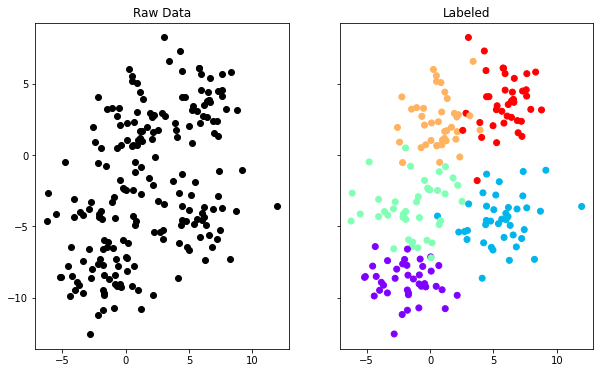

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create Data
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.8,random_state=40)
# If you want clearer clusters, decrease cluster_std


# Plot the data (with labels)
#   * Note: This is unsupervised learning, so we won't normally have labels.
#   * This is just a convenience for testing the program.
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Raw Data')
ax1.scatter(data[0][:,0],data[0][:,1],color='black')
ax2.set_title("Labeled")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data[0])
kmeans.cluster_centers_

array([[-1.62045233, -3.10851618],
       [ 5.97824235,  3.88013361],
       [ 5.5975865 , -4.47097081],
       [-1.72074917, -8.43878336],
       [ 0.60444818,  2.18499749]])

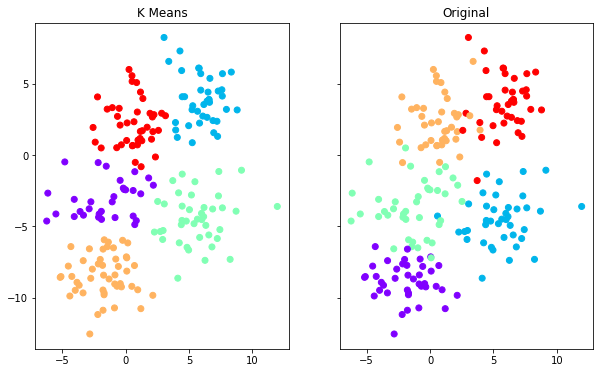

In [54]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
#ax1.scatter(kmeans.cluster_centers_)
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(data[1],kmeans.labels_))

[[ 0  0  0 40  0]
 [ 1  0 39  0  0]
 [29  0  1  8  2]
 [ 1  2  0  0 37]
 [ 0 37  1  0  2]]


## Centroid Initialization
How do we choose the initial centroids? There are many methods, but here are three:
1. You choose
    * Just pick $k$ points near the center of each cluster as you see

This is good for 2D, not bad for 3D, but gets really difficult in higher dimensions.

The hyperparameter `init` tells the algorithm how to set the initial points. In this case, just set it to the array of starting points.

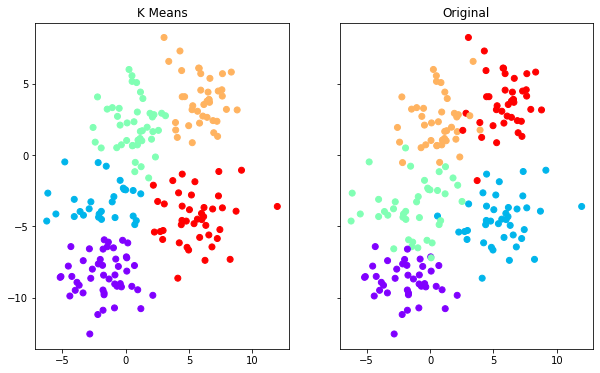

In [56]:
import numpy as np
init_pts = np.array([[-3,-10], [-3,-4], [0,3], [5,5], [5,-5]])

kmeans = KMeans(n_clusters=5, init=init_pts, n_init=1)

kmeans.fit(data[0])
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(data[1],kmeans.labels_))

[[40  0  0  0  0]
 [ 0  1  0  0 39]
 [ 8 26  4  0  2]
 [ 0  1 37  2  0]
 [ 0  0  2 37  1]]


Notice the `n_init` hyperparameter. This has to do with the second method for finding the best starting point:

2. Run the algorithm multiple times with different random initializations
    * Keep the best solution

The `n_init` hyperparameter sets the number of random initializations to try. If not used, it defaults to 10.

Which of the random initializations has the best solution? The perfomance is measured by the __inertia__, or the mean squared distance between each instance and its closest centroid. We can see the inertia using the `inertia_` instance variable:

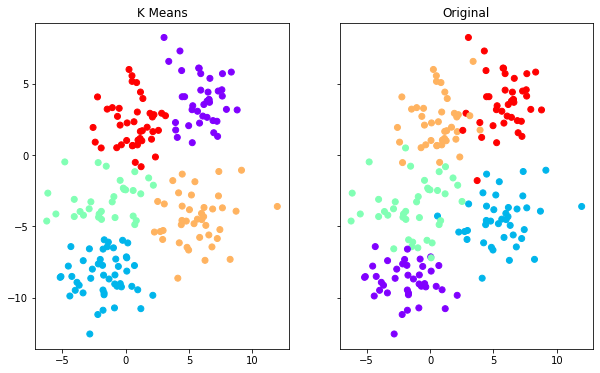

In [58]:
kmeans = KMeans(n_clusters=5, init="random", n_init=10)

kmeans.fit(data[0])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(data[1],kmeans.labels_))

[[ 0 40  0  0  0]
 [ 0  0  1 39  0]
 [ 0  8 29  1  2]
 [ 2  0  1  0 37]
 [37  0  0  1  2]]


In [60]:
print(kmeans.inertia_)

1120.4707777831804


The __score__ is the negative of the inertia, so as to follow the principle, "higher is better".

In [61]:
kmeans.score(data[0])

-1120.4707777831804

3. The __K-Means++__ algorithm is an improvement to K-Means.

If the `init` hyperparameter isn't defined, then it defauls to K-Means++. This was the result from the first time we ran the K-Means algorithm before discussing the Centroid Initialization problem.

Other ways to improve initial guesses include the __Accelerated K-Means__ and __mini-batch K-Means__.

## Optimal Number of Clusters

How do we know the number of clusters we should have in the data? The next figure shows why we can't just choose the one with lowest inertia:

Text(0.5, 1.0, 'Inertia for each run')

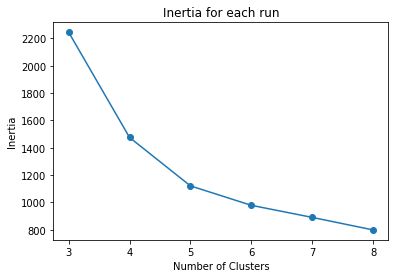

In [62]:
n = 8
inertia_values = np.zeros(n+1)

for k in range(3,n+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[0])
    inertia_values[k] = kmeans.inertia_

plt.plot(range(3,n+1),inertia_values[3:n+1], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia for each run')

The inertia continues to drop. But if we have too many clusters, then we risk overfitting the data.

To resolve this, we have 2 methods:
1. __The Elbow Method__
* Look at how steeply the inertia drops. At the point where the inertia stops dropping so rapidly, it forms a little "elbow" in the graph. This is one option for the optimum number of clusters.

Although it works, it isn't a very solid method mathematically, despite how simple it is.

2. __Silhouette Score__
* Measure the mean distance from each instance to all other instances in its cluster (call this mean $a$)
* Measure the mean distance from each instance to all other instances in the next closest cluster (call this mean $b$)
* The silhouette score is found as
$$\frac{b-a}{\max(a,b)}$$

This produces a value between -1 and 1:
* If score = 1, then the point is well within the region of that cluster
* If score = 0, then the point is near the boundary of the cluster
* If score = -1, then the point is outside the boundary of the cluster

The __mean silhouette score__ then determines how well the algorithm performed.

This method is more acurate, but is computationally expensive.

Text(0.5, 1.0, 'Silhouette Scores for each run')

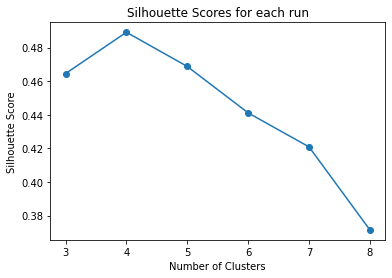

In [63]:
from sklearn.metrics import silhouette_score
silhouette_score(data[0], kmeans.labels_)

silhouette_values = np.zeros(n+1)

for k in range(3,n+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[0])
    silhouette_values[k] = silhouette_score(data[0], kmeans.labels_)

plt.plot(range(3,n+1),silhouette_values[3:n+1], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for each run')

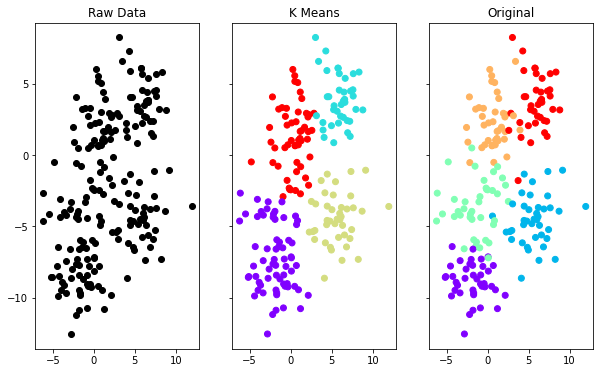

In [64]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

f, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True,figsize=(10,6))
ax0.set_title('Raw Data')
ax0.scatter(data[0][:,0],data[0][:,1], color='black')
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Limits of K-Means
Advantages
* Very simple algorithm
* Unless calculating silhouette scores, not computationally intensive

Disadvantages
* Need to run multiple times to avoid suboptimal solutions
* Large groups can often overlap and merge
* Can select initial points that don't converge, but stay between two clusters
  * This is especially a problem when the clusters are different sizes and shapes